In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df_matches = pd.read_csv('club_data.csv')
df_matches['diferencia_goles'] = df_matches['goles_local'] - df_matches['goles_visitante']

X = df_matches[['posesion_local (%)', 'tiros_arco_local']]
y = df_matches['diferencia_goles']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [3]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'MSE: {mse}')
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")
print(f"MAE: {mae}")

MSE: 4.961825867791307
RMSE: 2.227515626834368
R^2: -0.027825140920001656
MAE: 1.8852084530016093


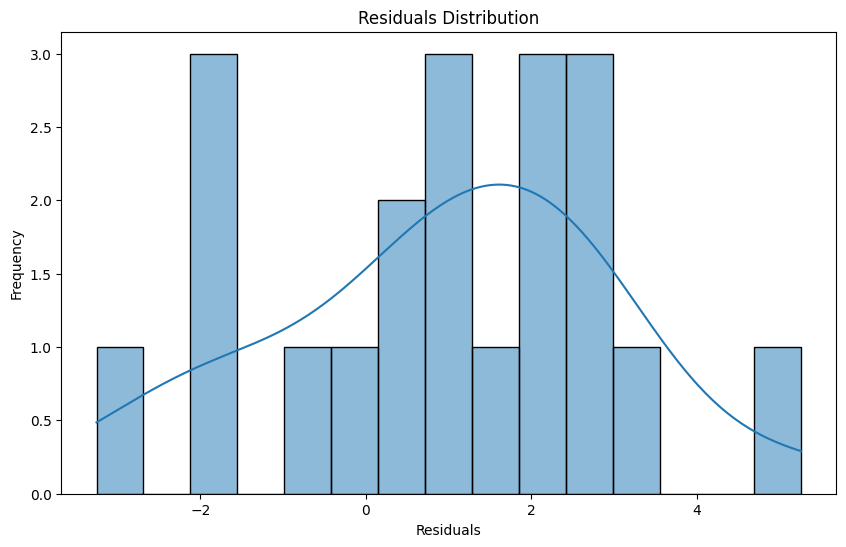

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(y_test - y_pred, bins=15, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

### Interpretracion rapida:

* **MSE/RMSE:** Caunto mas cerca de 0 mejor. Indican cuanto se alejan las predicciones
* **MAE:** Error promedio en goles, Facil de entender. Un MAE de 0.8 -> error promedio de 0.8 goles
* **$R^2$:** Cuanto explica el model del comportamiento real. 1 es perfecto, 0 es como adivinad

In [5]:
import ipywidgets as widgets

def evaluate_predictions(threshold_mae):
    quality = 'Good' if mae < threshold_mae else 'Bad'
    print(f'Mean Absolute Error: {mae} - Quality of predictions: {quality}')

threshold_slider = widgets.FloatSlider(
    min=0.1,
    max=5.0,
    step=0.1,
    value=1.0,
    description='MAE Threshold:'
)
widgets.interact(evaluate_predictions, threshold_mae=threshold_slider)

interactive(children=(FloatSlider(value=1.0, description='MAE Threshold:', max=5.0, min=0.1), Output()), _dom_…

<function __main__.evaluate_predictions(threshold_mae)>

In [6]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

In [7]:
df_results_tree = X_test.copy()
df_results_tree['goles_diferencia_real'] = y_test
df_results_tree['goles_diferencia_pred'] = y_pred_dt.round(2)

df_results_tree.head(10)

,posesion_local (%),tiros_arco_local,goles_diferencia_real,goles_diferencia_pred
83,47,3,3,0.00
53,60,3,3,2.67
70,50,5,0,0.00
45,57,7,3,2.00
44,45,5,5,-4.00
39,60,7,3,0.00
22,45,11,0,-1.00
80,49,5,1,0.00
10,48,5,-2,0.00
0,54,12,2,4.00


In [8]:
mse_tree = mean_squared_error(y_test, y_pred_dt)
rsme_tree = mse_tree ** 0.5
r2_tree = r2_score(y_test, y_pred_dt)
mae_tree = mean_absolute_error(y_test, y_pred_dt)

print(f'Mean Squared Error: {mse_tree}')
print(f'Root Mean Squared Error: {rsme_tree}')
print(f'R-squared: {r2_tree}')
print(f'Mean Absolute Error: {mae_tree}')

Mean Squared Error: 8.305555555555555
Root Mean Squared Error: 2.8819360776317637
R-squared: -0.7204672305656254
Mean Absolute Error: 2.0166666666666666


In [9]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)

In [10]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf ** 0.5
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print(f'Mean Squared Error (RF): {mse_rf}')
print(f'Root Mean Squared Error (RF): {rmse_rf}')
print(f'R-squared (RF): {r2_rf}')
print(f'Mean Absolute Error (RF): {mae_rf}')

Mean Squared Error (RF): 5.897734359744269
Root Mean Squared Error (RF): 2.4285251408507733
R-squared (RF): -0.22169536193563344
Mean Absolute Error (RF): 1.8216777777777782


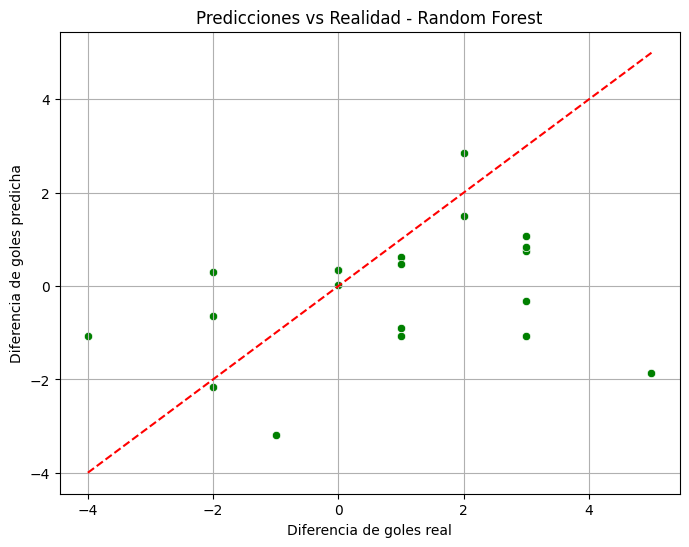

In [11]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_rf, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Diferencia de goles real")
plt.ylabel("Diferencia de goles predicha")
plt.title("Predicciones vs Realidad - Random Forest")
plt.grid(True)
plt.show()